
Integrantes:

David Bugoi

Fernando Javier Gómez Márquez

Daniel Hernández Martínez

### **Carga de datos**

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import os.path

In [2]:
RANDOM_STATE = 813

In [3]:
def genera_df(ficherocsv, nro_filas=None):
    try:
      from google.colab import drive
      drive.mount('/content/drive')
      df = pd.read_csv(os.path.join('drive/MyDrive/Colab Notebooks/',ficherocsv), nrows=nro_filas)
    except:   # si no es en google colab, se supone que estamos ejecutando el notebook en nuestro servidor local y que el fichero está en el mismo directorio
      df = pd.read_csv(ficherocsv, nrows=nro_filas)
    return df

In [4]:
fdatos = 'heart.csv'

df = genera_df(fdatos)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Comprobamos si existen valores nulos en el dataframe

In [5]:
df.isnull().values.any()

False

Como no hay ningún null ni NaN no hay que hacer tratamiento al dataframe. En caso de existir algún valor null tendríamos dos opiones: eliminar la fila o sustituir los nulos por algún valor, generalmente la media de la columna

# **LabelEncoder**
Usamos el LabelEncoder para pasar las variables catégoricas a numericas

In [6]:
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)
df_label.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [7]:
X = df_label.drop(['HeartDisease'], axis=1).values
Y = df_label['HeartDisease'].values

X_train_label, X_test_label, Y_train_label, Y_test_label = train_test_split(X, Y, test_size=0.1, random_state = RANDOM_STATE)
X_train_label, X_val_label, Y_train_label, Y_val_label = train_test_split(X_train_label, Y_train_label, test_size=0.1, random_state = RANDOM_STATE)

### **Escalar datos**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_label= scaler.fit_transform(X_train_label)

X_test_label= scaler.transform(X_test_label)

X_val_label= scaler.transform(X_val_label)

###**Entrenamiento con diferentes parámetros**

In [9]:
from sklearn.metrics import accuracy_score

Parámetros y valores a comprobar con el modelo de regresión logística

|Param|Values|
|--|--|
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	, 10 |
fit_prior = ['True','False']





In [10]:
alphas = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]
fit_priors = [True, False]

In [11]:
# Table structure
# penalty max_iterations learning_rate alpha eta
from sklearn.naive_bayes import BernoulliNB

results = []
for fit_prior in fit_priors:
  for alpha in alphas:
    print('Entrenando... alpha:{alpha} --- fit_prior:{fit_prior} ---'.format(alpha=alpha, fit_prior = fit_prior))
    # Traing model
    clf = BernoulliNB(alpha=alpha, fit_prior=fit_prior)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento
    clf.fit(X_train_label, Y_train_label)   # el método fit entrena el modelo con los datos que se le pasan
    # Generate prediction
    prediction = clf.predict(X_test_label)
    # Calculate accuracy
    accuracy = accuracy_score(Y_test_label,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([alpha,fit_prior,accuracy]) 

print(results)

Entrenando... alpha:1e-05 --- fit_prior:True ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.0001 --- fit_prior:True ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.001 --- fit_prior:True ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.01 --- fit_prior:True ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.1 --- fit_prior:True ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:1 --- fit_prior:True ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:1e-05 --- fit_prior:False ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.0001 --- fit_prior:False ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.001 --- fit_prior:False ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.01 --- fit_prior:False ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:0.1 --- fit_prior:False ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... alpha:1 --

In [12]:
results_df = pd.DataFrame(results,columns=['alpha','fit_prior','accuracy'])
results_df

,alpha,fit_prior,accuracy
0,0.00001,True,0.826087
1,0.00010,True,0.826087
2,0.00100,True,0.826087
3,0.01000,True,0.826087
4,0.10000,True,0.826087
5,1.00000,True,0.826087
6,0.00001,False,0.826087
7,0.00010,False,0.826087
8,0.00100,False,0.826087
9,0.01000,False,0.826087


###**Manejando los resultados de los modelos entrenados**

Establecer un umbral de precisión del 0,75

In [13]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

,alpha,fit_prior,accuracy
0,0.00001,True,0.826087
1,0.00010,True,0.826087
2,0.00100,True,0.826087
3,0.01000,True,0.826087
4,0.10000,True,0.826087
5,1.00000,True,0.826087
6,0.00001,False,0.826087
7,0.00010,False,0.826087
8,0.00100,False,0.826087
9,0.01000,False,0.826087


In [14]:
alpha, fit_prior, accuracy = results_top.iloc[0]

params = {'alpha':alpha, 'fit_prior':fit_prior}

params

{'alpha': 1e-05, 'fit_prior': True}

**Entrenamos el modelo con la mejor combinación de hiperparámetros**

In [15]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(**params)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento

clf.fit(X_train_label, Y_train_label)   # el método fit entrena el modelo con los datos que se le pasan

BernoulliNB(alpha=1e-05)

Entrenado el modelo ya se puede probar con el método predict_proba() para obtener las probabilidades de cada clase, y el método predict() para obtener la clase más probable.

In [16]:
pred_prob = clf.predict_proba(X_test_label)
print('[scikit-learn] Predicted probabilities:\n', pred_prob)

pred = clf.predict(X_test_label)
print('[scikit-learn] Prediction:', pred)

[scikit-learn] Predicted probabilities:
 [[3.00349160e-03 9.96996508e-01]
 [9.58937629e-04 9.99041062e-01]
 [4.76888421e-03 9.95231116e-01]
 [9.97171470e-01 2.82853008e-03]
 [3.00349160e-03 9.96996508e-01]
 [9.99263712e-01 7.36287904e-04]
 [9.58937629e-04 9.99041062e-01]
 [3.89136431e-03 9.96108636e-01]
 [9.99293856e-01 7.06143869e-04]
 [3.91859338e-04 9.99608141e-01]
 [1.27140509e-01 8.72859491e-01]
 [8.82806572e-01 1.17193428e-01]
 [9.96996680e-01 3.00331957e-03]
 [3.27599308e-01 6.72400692e-01]
 [4.41884237e-02 9.55811576e-01]
 [6.55564842e-03 9.93444352e-01]
 [9.97470275e-01 2.52972478e-03]
 [3.00853603e-04 9.99699146e-01]
 [8.33307907e-01 1.66692093e-01]
 [3.04687096e-01 6.95312904e-01]
 [1.16393531e-01 8.83606469e-01]
 [8.00757862e-02 9.19924214e-01]
 [3.00853603e-04 9.99699146e-01]
 [9.94077515e-01 5.92248510e-03]
 [9.79633603e-01 2.03663974e-02]
 [1.50009834e-03 9.98499902e-01]
 [7.64942023e-02 9.23505798e-01]
 [7.64942023e-02 9.23505798e-01]
 [9.94700470e-01 5.29953039e-03]
 [

### **Análisis con el mejor de los casos**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

Precisión (Acurracy) :  82.61%
Puntuación de validación cruzada(Cross Validation Score) con Train:  91.56%
Puntuación de validación cruzada(Cross Validation Score) con Val :  95.15%
Puntuación ROC_AUC :  82.58%


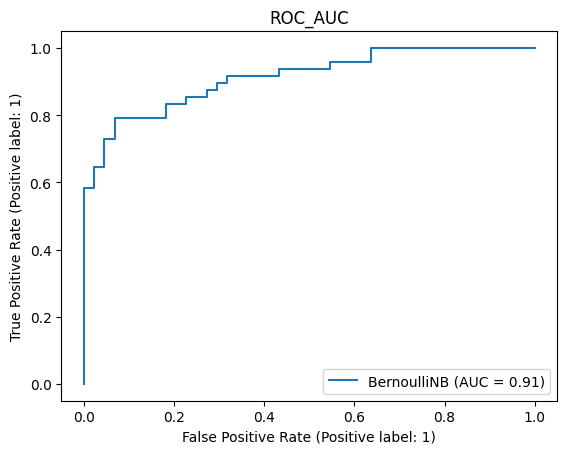

In [18]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(Y_test_label,pred)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train: ",'{0:.2%}'.format(cross_val_score(clf,X_train_label,Y_train_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(clf,X_val_label,Y_val_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(Y_test_label,pred)))

RocCurveDisplay.from_estimator(clf, X_test_label,Y_test_label)

plt.title('ROC_AUC')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.83      0.83      0.83        48

    accuracy                           0.83        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.83      0.83      0.83        92



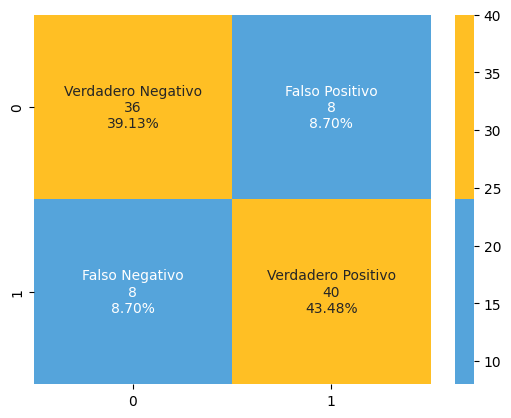

In [19]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(Y_test_label,clf.predict(X_test_label))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(Y_test_label,clf.predict(X_test_label)))

# **One Hot Encoder**


### **Aplicar One Hot Encoder**

In [20]:
categ_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_oneHot=pd.get_dummies(df,columns=categ_columns,drop_first=False)
df_oneHot.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### **Preparar datos**

In [21]:
X = df_oneHot.drop(['HeartDisease'], axis=1).values
Y = df_oneHot['HeartDisease'].values

In [22]:
from sklearn.model_selection import train_test_split

X_train_OH, X_test_OH, Y_train_OH, Y_test_OH = train_test_split(X, Y, test_size=0.1, random_state = RANDOM_STATE)
X_train_OH, X_val_OH, Y_train_OH, Y_val_OH = train_test_split(X_train_OH, Y_train_OH, test_size=0.1, random_state = RANDOM_STATE)

X_train_OH.shape, X_test_OH.shape, X_val_OH.shape

((743, 20), (92, 20), (83, 20))

### **Escalar datos**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_OH= scaler.fit_transform(X_train_OH)

X_test_OH= scaler.transform(X_test_OH)

X_val_OH= scaler.transform(X_val_OH)

###**Entrenamiento con diferentes parámetros**

In [24]:
from sklearn.metrics import accuracy_score

Parámetros y valores a comprobar con el modelo de regresión logística

|Param|Values|
|--|--|
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	, 10 |
fit_prior = ['True','False']





In [25]:
alphas = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]
fit_priors = [True, False]

In [26]:
# Table structure
from sklearn.naive_bayes import BernoulliNB

results = []
for fit_prior in fit_priors:
  for alpha in alphas:
    print('Entrenando... alpha:{alpha} --- fit_prior:{fit_prior} ---'.format(alpha=alpha, fit_prior = fit_prior))
    # Traing model
    clf = BernoulliNB(alpha=alpha, fit_prior=fit_prior)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento
    clf.fit(X_train_OH, Y_train_OH)   # el método fit entrena el modelo con los datos que se le pasan
    # Generate prediction
    prediction = clf.predict(X_test_OH)
    # Calculate accuracy
    accuracy = accuracy_score(Y_test_OH,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([alpha,fit_prior,accuracy]) 

print(results)

Entrenando... alpha:1e-05 --- fit_prior:True ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.0001 --- fit_prior:True ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.001 --- fit_prior:True ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.01 --- fit_prior:True ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.1 --- fit_prior:True ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:1 --- fit_prior:True ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:1e-05 --- fit_prior:False ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.0001 --- fit_prior:False ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.001 --- fit_prior:False ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.01 --- fit_prior:False ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:0.1 --- fit_prior:False ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... alpha:1 --

In [27]:
results_df = pd.DataFrame(results,columns=['alpha','fit_prior','accuracy'])
results_df

,alpha,fit_prior,accuracy
0,0.00001,True,0.869565
1,0.00010,True,0.869565
2,0.00100,True,0.869565
3,0.01000,True,0.869565
4,0.10000,True,0.869565
5,1.00000,True,0.869565
6,0.00001,False,0.869565
7,0.00010,False,0.869565
8,0.00100,False,0.869565
9,0.01000,False,0.869565


**Manejando los resultados de los modelos entrenados**

Establecer un umbral de precisión del 0,75

In [28]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

,alpha,fit_prior,accuracy
0,0.00001,True,0.869565
1,0.00010,True,0.869565
2,0.00100,True,0.869565
3,0.01000,True,0.869565
4,0.10000,True,0.869565
5,1.00000,True,0.869565
6,0.00001,False,0.869565
7,0.00010,False,0.869565
8,0.00100,False,0.869565
9,0.01000,False,0.869565


In [29]:
alpha, fit_prior, accuracy = results_top.iloc[0]

params = {'alpha':alpha, 'fit_prior':fit_prior}

params

{'alpha': 1e-05, 'fit_prior': True}

**Entrenamos el modelo con la mejor combinación de hiperparámetros**

In [30]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(**params)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento

clf.fit(X_train_OH, Y_train_OH)   # el método fit entrena el modelo con los datos que se le pasan

BernoulliNB(alpha=1e-05)

In [31]:
pred_prob = clf.predict_proba(X_test_OH)
print('[scikit-learn] Predicted probabilities:\n', pred_prob)

pred = clf.predict(X_test_OH)
print('[scikit-learn] Prediction:', pred)

[scikit-learn] Predicted probabilities:
 [[1.43372072e-04 9.99856628e-01]
 [8.93415932e-05 9.99910658e-01]
 [5.56463716e-04 9.99443536e-01]
 [9.99987238e-01 1.27618737e-05]
 [1.43372072e-04 9.99856628e-01]
 [9.99994694e-01 5.30637599e-06]
 [2.20102695e-05 9.99977990e-01]
 [1.43372072e-04 9.99856628e-01]
 [9.99978700e-01 2.13003714e-05]
 [9.26095929e-06 9.99990739e-01]
 [1.50422914e-02 9.84957709e-01]
 [8.88108927e-01 1.11891073e-01]
 [9.99943355e-01 5.66454947e-05]
 [3.30446170e-01 6.69553830e-01]
 [8.05128195e-03 9.91948718e-01]
 [2.49475028e-04 9.99750525e-01]
 [9.99949073e-01 5.09270343e-05]
 [3.81716919e-06 9.99996183e-01]
 [7.14387772e-01 2.85612228e-01]
 [8.03759314e-01 1.96240686e-01]
 [3.89459136e-02 9.61054086e-01]
 [1.40604513e-02 9.85939549e-01]
 [3.81716919e-06 9.99996183e-01]
 [9.98734806e-01 1.26519437e-03]
 [9.99945470e-01 5.45295117e-05]
 [1.90555111e-05 9.99980944e-01]
 [1.84515506e-02 9.81548449e-01]
 [6.45408376e-03 9.93545916e-01]
 [9.99262060e-01 7.37939507e-04]
 [

### **Análisis con el mejor de los casos**

Precisión (Acurracy) :  86.96%
Puntuación de validación cruzada(Cross Validation Score) con Train :  91.68%
Puntuación de validación cruzada(Cross Validation Score) con Val :  94.04%
Puntuación ROC_AUC :  87.03%


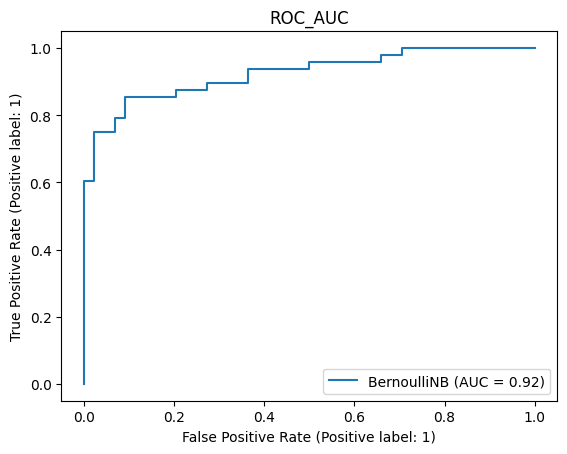

In [32]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(Y_test_OH,pred)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(clf,X_train_OH,Y_train_OH,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(clf,X_val_OH,Y_val_OH,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(Y_test_OH,pred)))

RocCurveDisplay.from_estimator(clf, X_test_OH,Y_test_OH)

plt.title('ROC_AUC')
plt.show()

**Matriz confusión**

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        44
           1       0.89      0.85      0.87        48

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



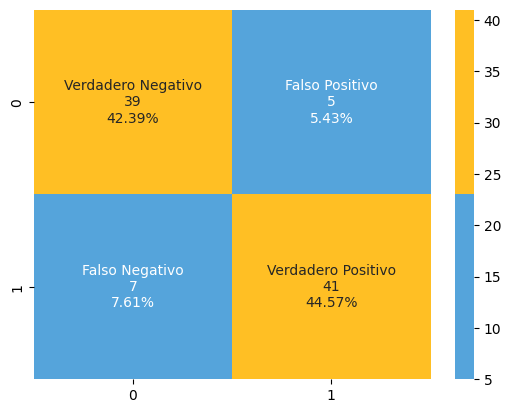

In [33]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(Y_test_OH,clf.predict(X_test_OH))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(Y_test_OH,clf.predict(X_test_OH)))